# Lab Three: Extending Logistic Regression

#### by: Mohammed Ahmed Abdelrazek Aboelela & Naim Barnett & Kian Rahimi


# TODO: The results should be reproducible using your report. "We should make sure that the final version of the notebook is working for every one of us before submission"

**Data Set :**
Credit Card Classification - *https://www.kaggle.com/datasets/parisrohan/credit-score-classification?select=train.csv*

## Preparation and Overview

### Overview and Business Understanding

It is very important in the work of global financial companies and also banks to know when to have a classifier that helps them to decide whether or not to trust customers when lending them large sum of money, such as a mortgage or a line of credit. To determine said reliability of customers, companies and banks utilizes the credit score, which is dependent on a variety of factors. Within the public domain of Kaggle, there is a large database that holds information on the known factors associated with credit score, and the final given credit score bracket. It contains over 100000 datapoints, and it utilizes both numeric and categorical data. Our goal is to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts. Thus, the main prediction task here is to classify the credit score of a customer based on their credit-related attributes. This is of direct interest to third parties (such as companies) that want a tool to reduce the efforts to classify their customer's credit scores. Consequently, for the prediction algorithm to be considered useful, it needs to be very efficient when applied to our test data in predicting the credit scores of the test customers. The model (from my own understanding of the difference between online and offline analysis) will be mostly for offline analysis, meaning that the model will be trained and tested using the already provided datapoints, and then the prediction data will be collected and fed to the algorithm that will predict the respective credit score bracket. 

### Cleaning, Preparing and Pre-Processing Dataset

In [150]:
#importing all the necessary packages
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
import re
import missingno as mn         #make sure to have the package installed "pip install missingno"
from sklearn.model_selection import train_test_split

In [151]:
#Loading the dataset
#data = pd.read_csv('../../Data/Lab_1_Dataset/train.csv', low_memory=False)
data = pd.read_csv('train.csv', low_memory=False)

data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


From the data below, we can see the overall statistics from the raw data. Ideally, once we are done cleaning, such values as the average will become more accurate. 

In [152]:
#Showing the initial form of the data and their related features and averages
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


Below is a table that includes a description of each attribute in our dataset.

| ID | Customer_ID | Month | Name | Age | SSN | Occupation | Annual_Income | Monthly_Inhand_Salary | Num_Bank_Accounts | Num_Credit_Card | Interest_Rate| Num_of_Loan | Type_of_Loan | Delay_from_due_date | Num_of_Delayed_Payments | Changed_Credit_Limit | Num_Credit_Inquiries | Credit_Mix | Outstanding_Debt | Credit_Utilization_Ratio | Credit_History_Age | Payment_of_Min_Amount | Total_EMI_per_month | Amount_invested_monthy | Payment_Behaviour | Monthly_Balance | Credit_Score |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| a unique identification of an entry | a unique identification of a person | the month of the year | the name of a person | the age of the person | the social security number of the person | the occupation of the person | the annual income of the person | the monthly base salary of a person | the number of bank accounts a person holds | the number of other credit cards held by a person | the interest rate on the credit card | the number of loans taken from the bank | the types of loan taken by a person | the average number of days delayed from the payment date | the average number of payments delayed by a person | the percentage change in credit card limit | the number of credit card inquiries | the classification of the mix of credits (the types of different credit accounts) | the remaining debt to be paid (in USD) | the utilization ratio of credit card (the sum of all your balances, divided by the sum of your cards' credit limits) | the age of credit history of the person | whether only the minimum amount was paid by the person | the monthly EMI "Equated monthly installment" payments (in USD) | the monthly amount invested by the customer (in USD) | the payment behavior of the customer (in USD) | the monthly balance amount of the customer (in USD) | the bracket of credit score (Poor, Standard, Good)|

Due to the relatively big number of attributes (27 + Credit Score), we will be more inclined to get rid of some of them if: 
1) They are not relevant to our analysis.

2) They have a big number of missing data (which make it hard to do imputation).

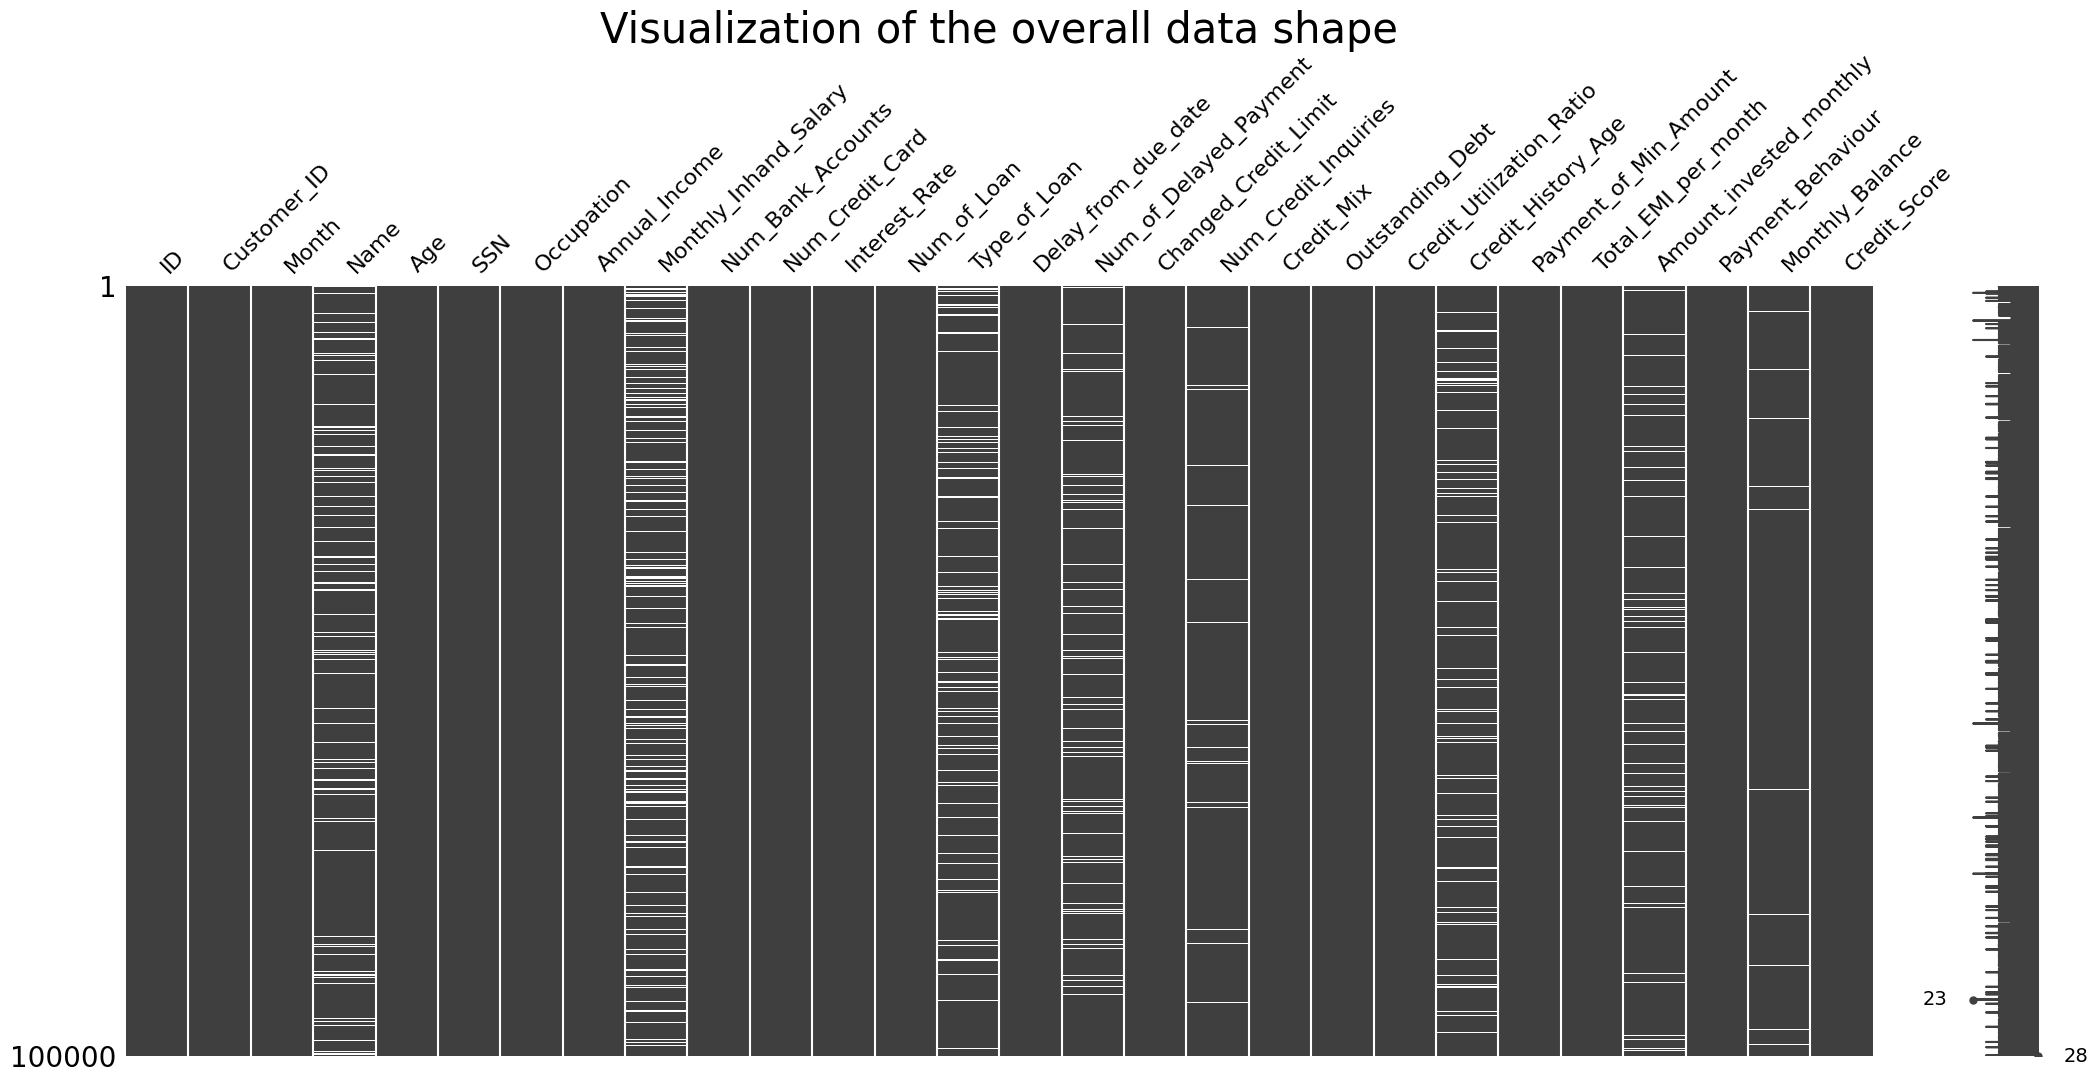

In [153]:
#Looking at the overall shape of the data
mn.matrix(data)
plt.title("Visualization of the overall data shape", fontsize=30)
plt.show()

To ensure our data maintains high quality, so our results can be as accurate as possible, we need to clean our data. </br>

After an attempt to impute the null or unusable values, we found that it ended up skewing the values. Additionally the sheer amount of values caused overfitting in some of our calculations. Resultantly, we chose to simply remove the unusable data .</br>

First, we are going to remove columns that are not useful to our analysis. We can see that information such as Customer_ID, Month, Name, and SSN are general information that is extremely unlikely to have any affect on the trends we are analyzing. As a result, we can remove the columns to narrow our dataset. 

In [154]:
#Print column names
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [155]:
#Remove Customer_ID, Month, Name, SSN, Occupation, Type_of_Loan
data.drop(['ID','Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Annual_Income             100000 non-null  object 
 2   Monthly_Inhand_Salary     84998 non-null   float64
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  object 
 7   Delay_from_due_date       100000 non-null  int64  
 8   Num_of_Delayed_Payment    92998 non-null   object 
 9   Changed_Credit_Limit      100000 non-null  object 
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Credit_Mix                100000 non-null  object 
 12  Outstanding_Debt          100000 non-null  object 
 13  Credit_Utilization_Ratio  100000 non-null  fl

Secondly, we are going to fill null values in the columns missing data. We also want to remove any illegal values

In [156]:
#Replace Invalid Values
data =data.replace(r'[^\w\s.]|_|-', '', regex=True) 
#Replace all blank strings will null to be dropped
data.replace('', np.nan, inplace=True)
#Remove all rows with null values
data.dropna(inplace=True);

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51930 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       51930 non-null  object 
 1   Annual_Income             51930 non-null  object 
 2   Monthly_Inhand_Salary     51930 non-null  float64
 3   Num_Bank_Accounts         51930 non-null  int64  
 4   Num_Credit_Card           51930 non-null  int64  
 5   Interest_Rate             51930 non-null  int64  
 6   Num_of_Loan               51930 non-null  object 
 7   Delay_from_due_date       51930 non-null  int64  
 8   Num_of_Delayed_Payment    51930 non-null  object 
 9   Changed_Credit_Limit      51930 non-null  object 
 10  Num_Credit_Inquiries      51930 non-null  float64
 11  Credit_Mix                51930 non-null  object 
 12  Outstanding_Debt          51930 non-null  object 
 13  Credit_Utilization_Ratio  51930 non-null  float64
 14  Credit

Thirdly, we want to clear out all duplicate data so our frequency analysis remains accurate. 

In [158]:
#Find duplicate instances
duplicates = data[data.duplicated()]

#Remove all duplicates
data = data.drop_duplicates()

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51930 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       51930 non-null  object 
 1   Annual_Income             51930 non-null  object 
 2   Monthly_Inhand_Salary     51930 non-null  float64
 3   Num_Bank_Accounts         51930 non-null  int64  
 4   Num_Credit_Card           51930 non-null  int64  
 5   Interest_Rate             51930 non-null  int64  
 6   Num_of_Loan               51930 non-null  object 
 7   Delay_from_due_date       51930 non-null  int64  
 8   Num_of_Delayed_Payment    51930 non-null  object 
 9   Changed_Credit_Limit      51930 non-null  object 
 10  Num_Credit_Inquiries      51930 non-null  float64
 11  Credit_Mix                51930 non-null  object 
 12  Outstanding_Debt          51930 non-null  object 
 13  Credit_Utilization_Ratio  51930 non-null  float64
 14  Credit

Fourthly, we would like to remove outliers from out dataset, so that our data analysis isn't skewed.

In [160]:
#Determine outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
#Remove outliers
data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis = 1)]
data = data[(data['Num_Bank_Accounts'] >= 0)]

C:\Users\naimb\AppData\Local\Temp\ipykernel_22996\2559638959.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis = 1)]


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42301 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       42301 non-null  object 
 1   Annual_Income             42301 non-null  object 
 2   Monthly_Inhand_Salary     42301 non-null  float64
 3   Num_Bank_Accounts         42301 non-null  int64  
 4   Num_Credit_Card           42301 non-null  int64  
 5   Interest_Rate             42301 non-null  int64  
 6   Num_of_Loan               42301 non-null  object 
 7   Delay_from_due_date       42301 non-null  int64  
 8   Num_of_Delayed_Payment    42301 non-null  object 
 9   Changed_Credit_Limit      42301 non-null  object 
 10  Num_Credit_Inquiries      42301 non-null  float64
 11  Credit_Mix                42301 non-null  object 
 12  Outstanding_Debt          42301 non-null  object 
 13  Credit_Utilization_Ratio  42301 non-null  float64
 14  Credit

Fifthly, and most importantly, we check every non-numeric column, assess it, clean it and convert it to numeric to be relevant for our logistic regression application on it

In [162]:
#After checking the unique values for the Age variable, we do the selection of the instances with reasonable ages.
print(data['Age'].value_counts(dropna=False))
data[['Age']] = data[['Age']].apply(pd.to_numeric)
data = data.loc[(data["Age"] > 0) & (data["Age"] <= 112)] #112 is the recorded oldest age ever!

26      1271
44      1271
38      1265
28      1264
36      1253
        ... 
6722       1
4732       1
1754       1
2212       1
2263       1
Name: Age, Length: 809, dtype: int64


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41105 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       41105 non-null  int64  
 1   Annual_Income             41105 non-null  object 
 2   Monthly_Inhand_Salary     41105 non-null  float64
 3   Num_Bank_Accounts         41105 non-null  int64  
 4   Num_Credit_Card           41105 non-null  int64  
 5   Interest_Rate             41105 non-null  int64  
 6   Num_of_Loan               41105 non-null  object 
 7   Delay_from_due_date       41105 non-null  int64  
 8   Num_of_Delayed_Payment    41105 non-null  object 
 9   Changed_Credit_Limit      41105 non-null  object 
 10  Num_Credit_Inquiries      41105 non-null  float64
 11  Credit_Mix                41105 non-null  object 
 12  Outstanding_Debt          41105 non-null  object 
 13  Credit_Utilization_Ratio  41105 non-null  float64
 14  Credit

In [164]:
#Converting the annual income values to numeric values.
print(data['Annual_Income'].value_counts(dropna=False))
data[['Annual_Income']] = data[['Annual_Income']].apply(pd.to_numeric)

40341.16     9
22434.16     9
17816.75     9
14822.81     8
21471.58     8
            ..
102432.51    1
9416591.0    1
57813.39     1
21467.56     1
39628.99     1
Name: Annual_Income, Length: 11805, dtype: int64


In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41105 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       41105 non-null  int64  
 1   Annual_Income             41105 non-null  float64
 2   Monthly_Inhand_Salary     41105 non-null  float64
 3   Num_Bank_Accounts         41105 non-null  int64  
 4   Num_Credit_Card           41105 non-null  int64  
 5   Interest_Rate             41105 non-null  int64  
 6   Num_of_Loan               41105 non-null  object 
 7   Delay_from_due_date       41105 non-null  int64  
 8   Num_of_Delayed_Payment    41105 non-null  object 
 9   Changed_Credit_Limit      41105 non-null  object 
 10  Num_Credit_Inquiries      41105 non-null  float64
 11  Credit_Mix                41105 non-null  object 
 12  Outstanding_Debt          41105 non-null  object 
 13  Credit_Utilization_Ratio  41105 non-null  float64
 14  Credit

In [166]:
#After checking the unique values for the number of loans variable, 
#we do the selection of the instances with reasonable number of loans.

print(data['Num_of_Loan'].value_counts(dropna=False))
data[['Num_of_Loan']] = data[['Num_of_Loan']].apply(pd.to_numeric)
data = data.loc[(data["Num_of_Loan"] > 0) & (data["Num_of_Loan"] <= 10)] #Limiting ourselves to only people with 10 loans or less, we lose only about 250 data points

3       6463
2       6434
4       6108
0       4599
1       4573
        ... 
1313       1
231        1
752        1
834        1
966        1
Name: Num_of_Loan, Length: 200, dtype: int64


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34652 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       34652 non-null  int64  
 1   Annual_Income             34652 non-null  float64
 2   Monthly_Inhand_Salary     34652 non-null  float64
 3   Num_Bank_Accounts         34652 non-null  int64  
 4   Num_Credit_Card           34652 non-null  int64  
 5   Interest_Rate             34652 non-null  int64  
 6   Num_of_Loan               34652 non-null  int64  
 7   Delay_from_due_date       34652 non-null  int64  
 8   Num_of_Delayed_Payment    34652 non-null  object 
 9   Changed_Credit_Limit      34652 non-null  object 
 10  Num_Credit_Inquiries      34652 non-null  float64
 11  Credit_Mix                34652 non-null  object 
 12  Outstanding_Debt          34652 non-null  object 
 13  Credit_Utilization_Ratio  34652 non-null  float64
 14  Credit

In [168]:
#After checking the unique values for the number of delayed payments variable, 
#we do the selection of the instances with reasonable number of delayed payments.

print(data['Num_of_Delayed_Payment'].value_counts(dropna=False))
data[['Num_of_Delayed_Payment']] = data[['Num_of_Delayed_Payment']].apply(pd.to_numeric)
data = data.loc[(data["Num_of_Delayed_Payment"] > 0) & (data["Num_of_Delayed_Payment"] <= 50)] #Limiting ourselves to only people with 50 delayed or less

17      2156
19      2095
16      2034
15      2031
20      2016
        ... 
1531       1
1673       1
1685       1
3489       1
2047       1
Name: Num_of_Delayed_Payment, Length: 300, dtype: int64


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33841 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       33841 non-null  int64  
 1   Annual_Income             33841 non-null  float64
 2   Monthly_Inhand_Salary     33841 non-null  float64
 3   Num_Bank_Accounts         33841 non-null  int64  
 4   Num_Credit_Card           33841 non-null  int64  
 5   Interest_Rate             33841 non-null  int64  
 6   Num_of_Loan               33841 non-null  int64  
 7   Delay_from_due_date       33841 non-null  int64  
 8   Num_of_Delayed_Payment    33841 non-null  int64  
 9   Changed_Credit_Limit      33841 non-null  object 
 10  Num_Credit_Inquiries      33841 non-null  float64
 11  Credit_Mix                33841 non-null  object 
 12  Outstanding_Debt          33841 non-null  object 
 13  Credit_Utilization_Ratio  33841 non-null  float64
 14  Credit

In [170]:
#Since it's a percentage, we do the selection of the instances with numbers between 0 and 100%.
print(data['Changed_Credit_Limit'].value_counts(dropna=False))
data[['Changed_Credit_Limit']] = data[['Changed_Credit_Limit']].apply(pd.to_numeric)
data = data.loc[(data["Changed_Credit_Limit"] > 0) & (data["Changed_Credit_Limit"] <= 100)] 

11.5                  50
8.22                  47
11.32                 46
9.25                  44
7.64                  44
                      ..
3.0700000000000003     1
23.61                  1
23.2                   1
21.48                  1
22.08                  1
Name: Changed_Credit_Limit, Length: 3308, dtype: int64


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33839 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       33839 non-null  int64  
 1   Annual_Income             33839 non-null  float64
 2   Monthly_Inhand_Salary     33839 non-null  float64
 3   Num_Bank_Accounts         33839 non-null  int64  
 4   Num_Credit_Card           33839 non-null  int64  
 5   Interest_Rate             33839 non-null  int64  
 6   Num_of_Loan               33839 non-null  int64  
 7   Delay_from_due_date       33839 non-null  int64  
 8   Num_of_Delayed_Payment    33839 non-null  int64  
 9   Changed_Credit_Limit      33839 non-null  float64
 10  Num_Credit_Inquiries      33839 non-null  float64
 11  Credit_Mix                33839 non-null  object 
 12  Outstanding_Debt          33839 non-null  object 
 13  Credit_Utilization_Ratio  33839 non-null  float64
 14  Credit

In [172]:
#Converting the unique credit mix values from Bad, Standard, and Good to 1, 2, and 3

print(data['Credit_Mix'].value_counts(dropna=False))
data = data.replace(['Bad', 'Standard', 'Good'], [1, 2, 3])
data['Credit_Mix'] = data[['Credit_Mix']].apply(pd.to_numeric)

Standard    16790
Good         8783
Bad          8266
Name: Credit_Mix, dtype: int64


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33839 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       33839 non-null  int64  
 1   Annual_Income             33839 non-null  float64
 2   Monthly_Inhand_Salary     33839 non-null  float64
 3   Num_Bank_Accounts         33839 non-null  int64  
 4   Num_Credit_Card           33839 non-null  int64  
 5   Interest_Rate             33839 non-null  int64  
 6   Num_of_Loan               33839 non-null  int64  
 7   Delay_from_due_date       33839 non-null  int64  
 8   Num_of_Delayed_Payment    33839 non-null  int64  
 9   Changed_Credit_Limit      33839 non-null  float64
 10  Num_Credit_Inquiries      33839 non-null  float64
 11  Credit_Mix                33839 non-null  int64  
 12  Outstanding_Debt          33839 non-null  object 
 13  Credit_Utilization_Ratio  33839 non-null  float64
 14  Credit

In [174]:
#Changing the outstanding debt to a numeric value

print(data['Outstanding_Debt'].value_counts(dropna=False))
data[['Outstanding_Debt']] = data[['Outstanding_Debt']].apply(pd.to_numeric)

434.36     11
832.55     11
824.36     11
935.74     11
100.3      11
           ..
1194.9      1
2860.18     1
40.87       1
1285.14     1
502.38      1
Name: Outstanding_Debt, Length: 9776, dtype: int64


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33839 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       33839 non-null  int64  
 1   Annual_Income             33839 non-null  float64
 2   Monthly_Inhand_Salary     33839 non-null  float64
 3   Num_Bank_Accounts         33839 non-null  int64  
 4   Num_Credit_Card           33839 non-null  int64  
 5   Interest_Rate             33839 non-null  int64  
 6   Num_of_Loan               33839 non-null  int64  
 7   Delay_from_due_date       33839 non-null  int64  
 8   Num_of_Delayed_Payment    33839 non-null  int64  
 9   Changed_Credit_Limit      33839 non-null  float64
 10  Num_Credit_Inquiries      33839 non-null  float64
 11  Credit_Mix                33839 non-null  int64  
 12  Outstanding_Debt          33839 non-null  float64
 13  Credit_Utilization_Ratio  33839 non-null  float64
 14  Credit

In [176]:
#Replace Credit History Age to numeric and keeping the year part only

print(data['Credit_History_Age'].value_counts(dropna=False))
data['Credit_History_Age'] = data['Credit_History_Age'].str[:2]
data[['Credit_History_Age']] = data[['Credit_History_Age']].apply(pd.to_numeric)

18 Years and 4 Months     185
19 Years and 9 Months     176
19 Years and 5 Months     172
15 Years and 11 Months    164
16 Years and 2 Months     163
                         ... 
33 Years and 8 Months       8
0 Years and 4 Months        8
0 Years and 3 Months        6
0 Years and 2 Months        6
33 Years and 7 Months       6
Name: Credit_History_Age, Length: 403, dtype: int64


In [177]:
#Dropping the "NM" values from the 'Payment_of_Min_Amount' and keeping only the 'Yes/NO' ones. Replacing them with 1/0

print(data['Payment_of_Min_Amount'].value_counts(dropna=False))
data = data.replace(['Yes', 'No', 'NM'], [1, 0, 3])
data['Payment_of_Min_Amount'] = data[['Payment_of_Min_Amount']].apply(pd.to_numeric)
data = data.loc[(data["Payment_of_Min_Amount"] < 3)]

Yes    19034
No     10806
NM      3999
Name: Payment_of_Min_Amount, dtype: int64


In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29840 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       29840 non-null  int64  
 1   Annual_Income             29840 non-null  float64
 2   Monthly_Inhand_Salary     29840 non-null  float64
 3   Num_Bank_Accounts         29840 non-null  int64  
 4   Num_Credit_Card           29840 non-null  int64  
 5   Interest_Rate             29840 non-null  int64  
 6   Num_of_Loan               29840 non-null  int64  
 7   Delay_from_due_date       29840 non-null  int64  
 8   Num_of_Delayed_Payment    29840 non-null  int64  
 9   Changed_Credit_Limit      29840 non-null  float64
 10  Num_Credit_Inquiries      29840 non-null  float64
 11  Credit_Mix                29840 non-null  int64  
 12  Outstanding_Debt          29840 non-null  float64
 13  Credit_Utilization_Ratio  29840 non-null  float64
 14  Credit

In [179]:
#Changing the Amount_invested_monthly to a numeric value
print(data['Amount_invested_monthly'].value_counts(dropna=False))
data[['Amount_invested_monthly']] = data[['Amount_invested_monthly']].apply(pd.to_numeric)

10000                 1336
0.0                     66
178.3440674122349        1
355.67824794714767       1
20.185232319922267       1
                      ... 
30.974483747540788       1
117.95719632279408       1
84.29158013392805        1
86.09071179397442        1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 28440, dtype: int64


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29840 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       29840 non-null  int64  
 1   Annual_Income             29840 non-null  float64
 2   Monthly_Inhand_Salary     29840 non-null  float64
 3   Num_Bank_Accounts         29840 non-null  int64  
 4   Num_Credit_Card           29840 non-null  int64  
 5   Interest_Rate             29840 non-null  int64  
 6   Num_of_Loan               29840 non-null  int64  
 7   Delay_from_due_date       29840 non-null  int64  
 8   Num_of_Delayed_Payment    29840 non-null  int64  
 9   Changed_Credit_Limit      29840 non-null  float64
 10  Num_Credit_Inquiries      29840 non-null  float64
 11  Credit_Mix                29840 non-null  int64  
 12  Outstanding_Debt          29840 non-null  float64
 13  Credit_Utilization_Ratio  29840 non-null  float64
 14  Credit

In [181]:
#Droppping the instances with the '98' value for the Payment Behaviour, then casting the six different classes into numeric values from 1 to 6

print(data['Payment_Behaviour'].value_counts(dropna=False))
data = data.replace(['HighspentLargevaluepayments', 'HighspentMediumvaluepayments', 'HighspentSmallvaluepayments','LowspentLargevaluepayments','LowspentMediumvaluepayments','LowspentSmallvaluepayments'], [6, 5, 4, 3, 2, 1])
data[['Payment_Behaviour']] = data[['Payment_Behaviour']].apply(pd.to_numeric)

LowspentSmallvaluepayments      7912
HighspentMediumvaluepayments    5266
LowspentMediumvaluepayments     3992
HighspentLargevaluepayments     3913
HighspentSmallvaluepayments     3427
LowspentLargevaluepayments      3138
98                              2192
Name: Payment_Behaviour, dtype: int64


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29840 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       29840 non-null  int64  
 1   Annual_Income             29840 non-null  float64
 2   Monthly_Inhand_Salary     29840 non-null  float64
 3   Num_Bank_Accounts         29840 non-null  int64  
 4   Num_Credit_Card           29840 non-null  int64  
 5   Interest_Rate             29840 non-null  int64  
 6   Num_of_Loan               29840 non-null  int64  
 7   Delay_from_due_date       29840 non-null  int64  
 8   Num_of_Delayed_Payment    29840 non-null  int64  
 9   Changed_Credit_Limit      29840 non-null  float64
 10  Num_Credit_Inquiries      29840 non-null  float64
 11  Credit_Mix                29840 non-null  int64  
 12  Outstanding_Debt          29840 non-null  float64
 13  Credit_Utilization_Ratio  29840 non-null  float64
 14  Credit

In [183]:
#Keeping the reasonable monthly balance (value < 10000), and the converting to numeric values

print(data['Monthly_Balance'].value_counts(dropna=False))
data[['Monthly_Balance']] = data[['Monthly_Balance']].astype('float64')
data = data.loc[(data["Monthly_Balance"] < 10000)]

333333333333333333333333333    2
244.5653167062043              1
263.5431823187104              1
374.9437003925682              1
233.34687368752728             1
                              ..
521.6814439072377              1
526.7317913022313              1
452.2044490665367              1
385.4159640192141              1
393.6736955618808              1
Name: Monthly_Balance, Length: 29839, dtype: int64


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29838 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       29838 non-null  int64  
 1   Annual_Income             29838 non-null  float64
 2   Monthly_Inhand_Salary     29838 non-null  float64
 3   Num_Bank_Accounts         29838 non-null  int64  
 4   Num_Credit_Card           29838 non-null  int64  
 5   Interest_Rate             29838 non-null  int64  
 6   Num_of_Loan               29838 non-null  int64  
 7   Delay_from_due_date       29838 non-null  int64  
 8   Num_of_Delayed_Payment    29838 non-null  int64  
 9   Changed_Credit_Limit      29838 non-null  float64
 10  Num_Credit_Inquiries      29838 non-null  float64
 11  Credit_Mix                29838 non-null  int64  
 12  Outstanding_Debt          29838 non-null  float64
 13  Credit_Utilization_Ratio  29838 non-null  float64
 14  Credit

In [185]:
#Convert Credit Score from Poor, Standard, and Good to 1, 2, and 3

print(data['Credit_Score'].value_counts(dropna=False))
data = data.replace(['Poor', 'Standard', 'Good'], [1, 2, 3])
data['Credit_Score'] = data[['Credit_Score']].apply(pd.to_numeric)                                                                  

2       16311
Poor     9071
3        4456
Name: Credit_Score, dtype: int64


In [186]:
data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29838 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       29838 non-null  int64  
 1   Annual_Income             29838 non-null  float64
 2   Monthly_Inhand_Salary     29838 non-null  float64
 3   Num_Bank_Accounts         29838 non-null  int64  
 4   Num_Credit_Card           29838 non-null  int64  
 5   Interest_Rate             29838 non-null  int64  
 6   Num_of_Loan               29838 non-null  int64  
 7   Delay_from_due_date       29838 non-null  int64  
 8   Num_of_Delayed_Payment    29838 non-null  int64  
 9   Changed_Credit_Limit      29838 non-null  float64
 10  Num_Credit_Inquiries      29838 non-null  float64
 11  Credit_Mix                29838 non-null  int64  
 12  Outstanding_Debt          29838 non-null  float64
 13  Credit_Utilization_Ratio  29838 non-null  float64
 14  Credit

Now that the data has been cleaned and simplified. We can describe it again to note a less skewed final view. 

In [187]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,29838.0,32.939875,1.070644e+01,14.000000,24.000000,33.000000,41.000000,9.500000e+01
Annual_Income,29838.0,172819.822567,1.439527e+06,7005.930000,18508.070000,34669.870000,65497.605000,2.419806e+07
Monthly_Inhand_Salary,29838.0,3746.172305,2.763656e+03,303.645417,1548.323750,2868.609167,5358.051667,1.236176e+04
Num_Bank_Accounts,29838.0,5.503385,2.526510e+00,0.000000,4.000000,6.000000,7.000000,1.100000e+01
Num_Credit_Card,29838.0,5.614116,2.050596e+00,0.000000,4.000000,6.000000,7.000000,1.100000e+01
Interest_Rate,29838.0,14.993532,8.716494e+00,1.000000,8.000000,14.000000,20.000000,3.400000e+01
Num_of_Loan,29838.0,3.877472,2.156059e+00,1.000000,2.000000,4.000000,5.000000,9.000000e+00
Delay_from_due_date,29838.0,20.645150,1.319568e+01,-5.000000,10.000000,18.000000,28.000000,5.500000e+01
Num_of_Delayed_Payment,29838.0,13.788324,5.941970e+00,1.000000,9.000000,14.000000,18.000000,2.800000e+01
Changed_Credit_Limit,29838.0,10.836254,6.680528e+00,0.010000,5.780000,9.800000,15.420000,3.629000e+01


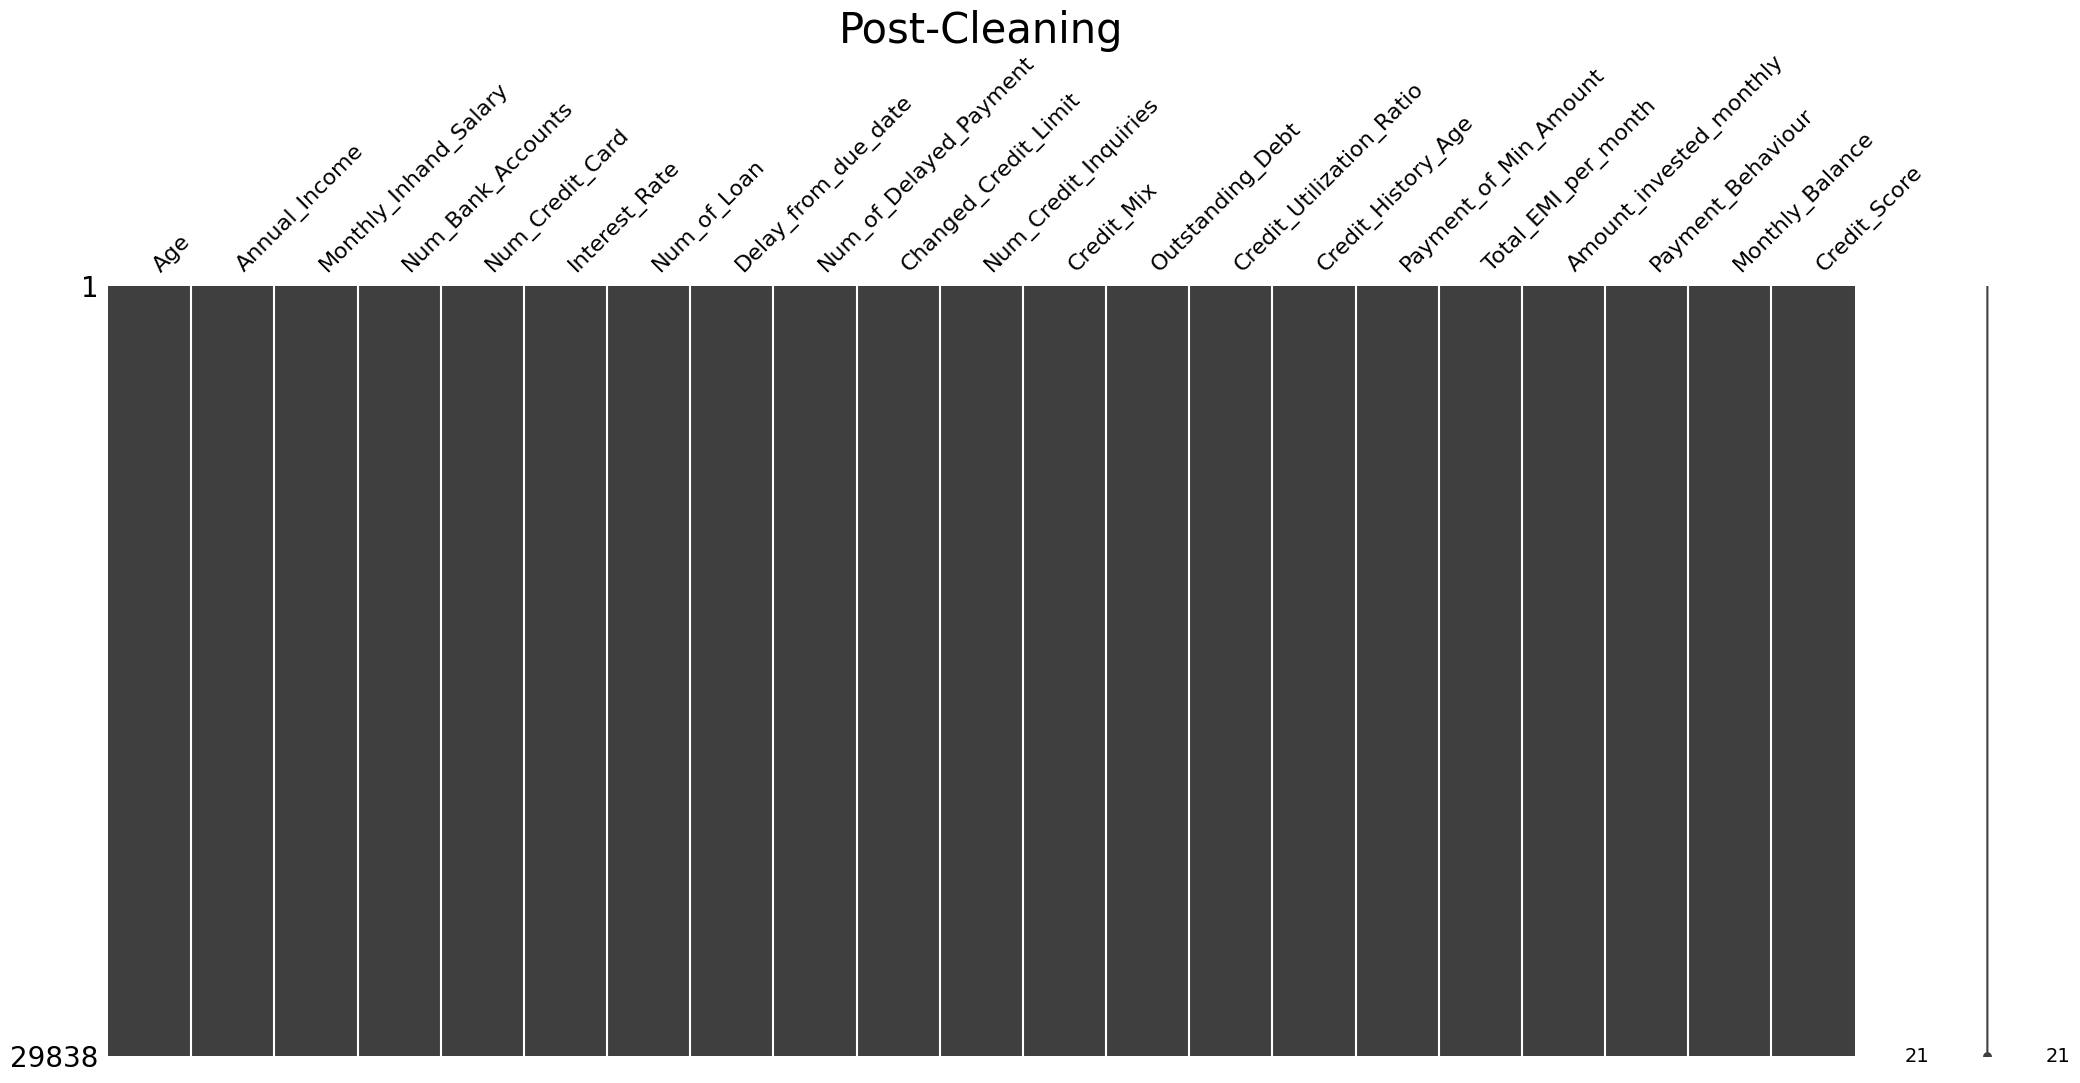

In [188]:
mn.matrix(data)
plt.title("Post-Cleaning", fontsize=30)
plt.show()

Now, we have fully cleaned and prepared all the data to be used in our logistic regression classification algorithm. We have clean dataset of 29838 instances, and 20 different clean numeric features ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'] and one target variable which is the credit score bracket, labeled in the manner { "Good" : 3, "Standard" : 2, "Poor": 1}.

### Splitting data

In [189]:
# Creating our data matrix (X) and our target variable (y) that we will work on from the dataframe we have
X = data[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']].to_numpy()
#y = data[['Credit_Score']].to_numpy()
y = data.Credit_Score.to_numpy()
print("The shape of the data matrix: " + str(X.shape))
print("The shape of the target variable: " + str(y.shape))


The shape of the data matrix: (29838, 20)
The shape of the target variable: (29838,)


In [190]:
# Dividing the data into training and testing data using an 80% training and 20% testing split.
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.2, random_state=0)
print("The training matrix and target shapes: " + str(X_train.shape)+ ' & ' + str(y_train.shape))
print("The testing matrix and target shapes: " + str(X_test.shape)+ ' & ' + str(y_test.shape))

The training matrix and target shapes: (23870, 20) & (23870,)
The testing matrix and target shapes: (5968, 20) & (5968,)


Question: Argue "for" or "against" splitting your data using an 80/20 split. That is, why is the 80/20 split appropriate (or not) for your dataset?  

Answer: COMING SOON

## Modeling (Mostly Kian's part and Naim and Mohammed)

The implementation of logistic regression must be written only from the examples given to you by the instructor. No credit will be assigned to teams that copy implementations from another source, regardless of if the code is properly cited. 

[2 points] Create a custom, one-versus-all logistic regression classifier using numpy and scipy to optimize. Use object oriented conventions identical to scikit-learn. You should start with the template developed by the instructor in the course. You should add the following functionality to the logistic regression classifier:

Ability to choose optimization technique when class is instantiated: either stochastic ascent, stochastic gradient ascent, or {Newton's method/Quasi Newton methods}. 

Update the gradient calculation to include a customizable regularization term (either using no regularization, L1 regularization, L2 regularization, or both L1 and L2 regularization). Associate a cost with the regularization term, "C", that can be adjusted when the class is instantiated.  

[1.5 points] Train your classifier to achieve good generalization performance. That is, adjust the optimization technique and the value of the regularization term(s) "C" to achieve the best performance on your test set. Visualize the performance of the classifier in terms of accuracy versus the parameters you investigated. 

[1.5 points] Compare the performance of your "best" logistic regression optimization procedure to the procedure used in scikit-learn. Visualize the performance differences in terms of training time and classification performance. Discuss the results.  Compare your method pre and post optimization techniques.


The logistic regression was created through the help of [Logistic Regression.ipynb](https://github.com/eclarson/MachineLearningNotebooks/blob/master/05.%20Logistic%20Regression.ipynb) and [Optimization.ipynb](https://github.com/eclarson/MachineLearningNotebooks/blob/master/06.%20Optimization.ipynb) by Dr. Larson.

With the help of a Binary Logistic Regression class, the LogisticRegression object will take in 5 parameters:
1. eta
2. iterations
3. optimization method [steepest, stochastic, newton]
4. c
5. reg (regularization method) [none, l1, l2, both]

In [191]:
import numpy as np
from scipy.special import expit

class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta = 0.01, iterations=20, optimization = 'sa', c = 0, reg = 'none'):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
        self.optim = optimization
        self.c = c
        self.reg = reg
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return expit(theta) #1/(1+np.exp(-theta))
    
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
        
blr = BinaryLogisticRegressionBase(eta = 0.1)
print(blr)

Base Binary Logistic Regression Object, Not Trainable


## One-Versus-All Logist Regression Classifier

In order to create a 1 v. all logistic regression, we must take account of the different optimization methods it could take in. Because each method requires a different gradient algorithm, we should do checking to make ensure we are using the right one.

* Optimization Method
    * steepest -> steepest ascent
    * stochastic -> stochastic gradient ascent
    * newton -> newton's method
    
* Regularization Method
    * none -> No method
    * l1 -> L1
    * l2 -> Lw
    * both -> both L1 and L2

To satisfy working with the regularization methods, the gradient method will call another function which returns the necessary values for gradient calculation.




In [192]:
from numpy.linalg import pinv

# inherit from base class
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero

        if self.optim == 'steepest':
            ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
            gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
            gradient = gradient.reshape(self.w_.shape)
            gradient[1:] += self.c * self._reg()
        
            return gradient

        if self.optim == 'stochastic':
            idx = int(np.random.rand()*len(y)) # grab random instance
            ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
            gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
            
            gradient = gradient.reshape(self.w_.shape)
            gradient[1:] += self.c * self._reg()
            
            return gradient

        if self.optim == 'newton':
            g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
            hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.c # calculate the hessian

            ydiff = y-g # get y difference
            gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
            gradient = gradient.reshape(self.w_.shape)
            gradient[1:] +=  self.c * self._reg()
            
            return pinv(hessian) @ gradient


    #regularization methods
    def _reg(self):
        #no regularization
        if self.reg == 'none':
            return self.w_[1:]
        elif self.reg == 'l1':
            return np.sign(self.w_[1:])
        elif self.reg == 'l2':
            return -2 * self.w_[1:]
        elif self.reg == 'l1l2':
            return -2 * self.w_[1:] + np.sign(self.w_[1:])
       
    # public:
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

            
blr = BinaryLogisticRegression(0.1)
print(blr)

Untrained Binary Logistic Regression Object


In [193]:
class LogisticRegression:
    def __init__(self, eta = 0.01, iterations=20, optimization = 'sa', c = 0.001, reg = 'none'):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
        self.optim = optimization
        self.c = c
        self.reg = reg
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = BinaryLogisticRegression(eta=self.eta,
                                                 iterations=self.iters,
                                                 optimization=self.optim,
                                                 c=self.c,
                                                 reg=self.reg)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row
    
lr = LogisticRegression(eta=0.1,iterations=1500, optimization='steepest')
print(lr)

Untrained MultiClass Logistic Regression Object


## Model Parameters Variation Testing

In an attempt to determine the best variable values for our logistic function, we will test ther variation of each variable, and observe it's effect on the accuracy and processing time. For this testing, we must use a method that will give us a consistant result at each execution. Using the Stocastic method will not be suitable, as it choses points in the gradient at random. Therefore, we will use the steepest descent method with an arbitrary regularization of 'l1'. Fist, we will look at variations in the step size (eta). We will look to keep the number of iterations at a minimum to reduce processing time.

#### Eta variation:

In [194]:
from sklearn.metrics import accuracy_score

# eta = 0.01
lr1 = LogisticRegression(eta=0.01, iterations=100, optimization='steepest', c=0.01, reg='l1')
lr1.fit(X_train,y_train)

yhat = lr1.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.5521112600536193


In [195]:
# eta = 0.02
lr2 = LogisticRegression(eta=0.02, iterations=100, optimization='steepest', c=0.01, reg='l1')
lr2.fit(X_train,y_train)

yhat = lr2.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.5521112600536193


In [196]:
# eta = 1
lr3 = LogisticRegression(eta=1, iterations=100, optimization='steepest', c=0.01, reg='l1')
lr3.fit(X_train,y_train)

yhat = lr3.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.5521112600536193


In [197]:
# eta = 10
lr4 = LogisticRegression(eta=10, iterations=100, optimization='steepest', c=0.01, reg='l1')
lr4.fit(X_train,y_train)

yhat = lr4.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.5521112600536193


In [198]:
# eta = 0.001
lr5 = LogisticRegression(eta=0.001, iterations=100, optimization='steepest', c=0.01, reg='l1')
lr5.fit(X_train,y_train)

yhat = lr5.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.5521112600536193


In [199]:
# eta = 0.0001
lr6 = LogisticRegression(eta=0.0001, iterations=100, optimization='steepest', c=0.01, reg='l1')
lr6.fit(X_train,y_train)

yhat = lr6.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.5521112600536193


Through the eta variation at 100 iterations, we see no change in the accuracy of the model. Let's try adjusting the interation size of our model with an arbitrarily selected step size. For the rest of testing, we will use 0.1 for eta.

#### Variation in the number of iterations:

In [200]:
from time import time
start = time()

# iterations = 100
lr1 = LogisticRegression(eta=0.1, iterations=100, optimization='steepest', c=0.01, reg='l1')
lr1.fit(X_train,y_train)

yhat = lr1.predict(X_test)
end = time()
print('Accuracy of: ',accuracy_score(y_test,yhat))
execution_time = end - start
print("Execution Time : " + str(round(execution_time, 2)) + 's')

Accuracy of:  0.5521112600536193
Execution Time : 1.76s


Note the execution time of the model at 100 iterations.

In [201]:
# iterations = 200
lr2 = LogisticRegression(eta=0.1, iterations=200, optimization='steepest', c=0.01, reg='l1')
lr2.fit(X_train,y_train)

yhat = lr2.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.2975871313672922


In [202]:
# iterations = 300
lr3 = LogisticRegression(eta=0.1, iterations=300, optimization='steepest', c=0.01, reg='l1')
lr3.fit(X_train,y_train)

yhat = lr3.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.2975871313672922


In [203]:
# iterations = 400
lr4 = LogisticRegression(eta=0.1, iterations=400, optimization='steepest', c=0.01, reg='l1')
lr4.fit(X_train,y_train)

yhat = lr4.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.5519436997319035


In [204]:
# iterations = 500
lr5 = LogisticRegression(eta=0.1, iterations=500, optimization='steepest', c=0.01, reg='l1')
lr5.fit(X_train,y_train)

yhat = lr5.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.5507707774798928


In [205]:
# iterations = 1000
start = time()
lr6 = LogisticRegression(eta=0.1, iterations=1000, optimization='steepest', c=0.01, reg='l1')
lr6.fit(X_train,y_train)

yhat = lr6.predict(X_test)
end = time()
print('Accuracy of: ',accuracy_score(y_test,yhat))
execution_time = end - start
print("Execution Time : " + str(round(execution_time, 2)) + 's')

Accuracy of:  0.2975871313672922
Execution Time : 18.41s


Notice the considerable increase in execution time, ~8x the initial runtime at 1000 iterations. In additon, the accuracy dropped by almost 1/2 the initial value. Though by a small margin, the accuracy at 100 iterations still stands to be the highest recorded accuracy at ~55.2%. We will next test and bserve the effects when varying the regularization cost (c).

#### Regularization Cost variation:

In [206]:
# c = 0.01
lr1 = LogisticRegression(eta=0.1, iterations=100, optimization='steepest', c=0.01, reg='l1')
lr1.fit(X_train,y_train)

yhat = lr1.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.5521112600536193


In [207]:
# c = 0.001
lr2 = LogisticRegression(eta=0.1, iterations=100, optimization='steepest', c=0.001, reg='l1')
lr2.fit(X_train,y_train)

yhat = lr2.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.5521112600536193


In [208]:
# c = 0.1
lr3 = LogisticRegression(eta=0.1, iterations=100, optimization='steepest', c=0.1, reg='l1')
lr3.fit(X_train,y_train)

yhat = lr3.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.5521112600536193


In [209]:
# c = 1
lr4 = LogisticRegression(eta=0.1, iterations=100, optimization='steepest', c=1, reg='l1')
lr4.fit(X_train,y_train)

yhat = lr4.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.5522788203753352


As shown in the third test, there is little to no improvement in the accuracy of our model at 100 iterations, with a regularization cost variation from 0.001-1.

Through testing the variation of our function parameters, we conclude we can optimize the accuracy of our funtion with an eta value of 0.1, 100 iterations, and a regularization cost in the range of 0.001-1. With these variable values, we can producae an accuracy of ~55.2%. These variable only account for a portion of the parameters that can have an effect on our accuracy outcome. In addition, we want to look at the processing time as well as variations in the method use with various regularization techniques. We will explore these variations in a later section of this report.

In [210]:
from ipywidgets import widgets as wd
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit

num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)

def lr_explor(cost):
    print('Running')
    lr_clf = LogisticRegression(eta=0.01,iterations=500, optimization='steepest', reg='l1',
                                            c=float(cost)) # get object
    acc = []
    for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
        lr_clf.fit(X[train_indices],y[train_indices])  # train object
        y_hat = lr_clf.predict(X[test_indices]) # get test set predictions
        acc.append(mt.accuracy_score(y[test_indices],y_hat))
        
    acc = np.array(acc)
    print(acc.mean(),'+-',2.7*acc.std())
        
wd.interact(
    lr_explor,cost=list(np.logspace(-4,1,15)),__manual=True)

interactive(children=(Dropdown(description='cost', options=(0.0001, 0.00022758459260747887, 0.0005179474679231…

<function __main__.lr_explor(cost)>

In [211]:
%%time

# alternatively, we can also graph out the values using boxplots
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)

def lr_explor(cost):
    lr_clf = LogisticRegression(eta=0.001,iterations=875, optimization='steepest', reg='l1',
                                            c=float(cost)) # get object
    acc = []
    for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
        lr_clf.fit(X[train_indices],y[train_indices])  # train object
        y_hat = lr_clf.predict(X[test_indices]) # get test set predictions
        acc.append(mt.accuracy_score(y[test_indices],y_hat))
        
    acc = np.array(acc)
    return acc

costs = np.logspace(-5,1,20)
accs = []
for c in costs:
    accs.append(lr_explor(c))

CPU times: total: 4min 1s
Wall time: 15min 29s


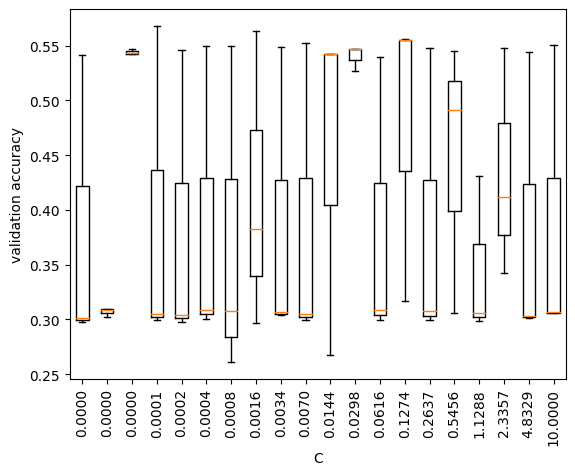

In [212]:
# now show a boxplot of the data across c
from matplotlib import pyplot as plt
%matplotlib inline

plt.boxplot(accs)
plt.xticks(range(1,len(costs)+1),['%.4f'%(c) for c in costs],rotation='vertical')
plt.xlabel('C')
plt.ylabel('validation accuracy')
plt.show()

### Training Logistic Regression Classifier

To train the classifer, we will run Logistic Regression against all optimization and regularizatoin methods at different C values. For the step size and number of iterations, we will use the previously determined values of 0.1 and 100 respectively; while we train the model against a variation of c values between 0.001 and 1.

In [214]:
results = {} # dictionary so that values of accuracy can be assigned to method
cList = [1, 0.1, 0.01, 0.001] # use 1 - 0.001..saw these values on class ipynb and thought it would be reasonable
regList = ['none', 'l1', 'l2', 'l1l2']
optList = ['steepest', 'stochastic', 'newton']

for opt in optList:
    for reg in regList:
        for cost in cList:
            lr = LogisticRegression(eta=0.1, iterations=100, optimization=opt, reg=reg, c=int(cost))
            lr.fit(X_train, y_train)
            yhat = lr.predict(X_test)
                    
            accuracy = accuracy_score(y_test, yhat)
            tech = str(opt) + "," + str(reg) + "," + str(cost)
            print(tech + ":", accuracy)

            results[tech] = accuracy



steepest,none,1: 0.35338471849865954
steepest,none,0.1: 0.5521112600536193
steepest,none,0.01: 0.5521112600536193
steepest,none,0.001: 0.5521112600536193
steepest,l1,1: 0.5522788203753352
steepest,l1,0.1: 0.5521112600536193
steepest,l1,0.01: 0.5521112600536193
steepest,l1,0.001: 0.5521112600536193
steepest,l2,1: 0.5519436997319035
steepest,l2,0.1: 0.5521112600536193
steepest,l2,0.01: 0.5521112600536193
steepest,l2,0.001: 0.5521112600536193
steepest,l1l2,1: 0.5519436997319035
steepest,l1l2,0.1: 0.5521112600536193
steepest,l1l2,0.01: 0.5521112600536193
steepest,l1l2,0.001: 0.5521112600536193
stochastic,none,1: 0.5226206434316354
stochastic,none,0.1: 0.5665214477211796
stochastic,none,0.01: 0.5522788203753352
stochastic,none,0.001: 0.2975871313672922
stochastic,l1,1: 0.2975871313672922
stochastic,l1,0.1: 0.2975871313672922
stochastic,l1,0.01: 0.2975871313672922
stochastic,l1,0.001: 0.2102882037533512
stochastic,l2,1: 0.5519436997319035
stochastic,l2,0.1: 0.3394772117962466
stochastic,l2,0

In [215]:
methods = []
accuracies = []
for name, accs in results.items():
    nameList = name.split(',')
    methods.append(nameList)
    accuracies.append(accs)

maxAcc = max(accuracies)
maxAccIndex = accuracies.index(maxAcc)

print("Best Method:", methods[maxAccIndex])
print("Best Accuracy:", accuracies[maxAccIndex])

Best Method: ['newton', 'none', '1']
Best Accuracy: 0.6697386058981233


### Visualizing Training Data

In [216]:
steepest = []
for i in range(len(methods)):
    if methods[i][0] == 'steepest':
        temp = [methods[i][0], methods[i][1], methods[i][2], accuracies[i]]
        steepest.append(temp)

steepest_none = []
steepest_l1 = []
steepest_l2 = []
steepest_both = []

none_regs = []
l1_regs = []
l2_regs = []
both_regs = []

none_accus = []
l1_accus = []
l2_accus = []
both_accus = []

none_cs = []
l1_cs = []
l2_cs = []
both_cs = []

regs = []
accus = []

for i in range(len(steepest)):
    regs.append(steepest[i][1])
    accus.append(steepest[i][3])
    
    if steepest[i][1] == 'none': 
        steepest_none.append(steepest[i])
        none_regs.append(steepest[i][1])
        none_accus.append(steepest[i][3])
        none_cs.append(steepest[i][2])
        
    elif steepest[i][1] == 'l1': 
        steepest_l1.append(steepest[i])
        l1_regs.append(steepest[i][1])
        l1_accus.append(steepest[i][3])
        l1_cs.append(steepest[i][2])

    elif steepest[i][1] == 'l2': 
        steepest_l2.append(steepest[i])
        l2_regs.append(steepest[i][1])
        l2_accus.append(steepest[i][3])
        l2_cs.append(steepest[i][2])

    elif steepest[i][1] == 'l1l2':
        steepest_both.append(steepest[i])
        both_regs.append(steepest[i][1])
        both_accus.append(steepest[i][3])
        both_cs.append(steepest[i][2])

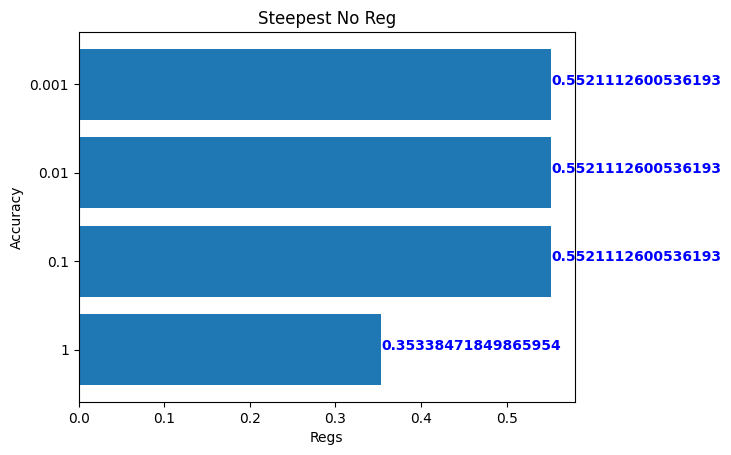

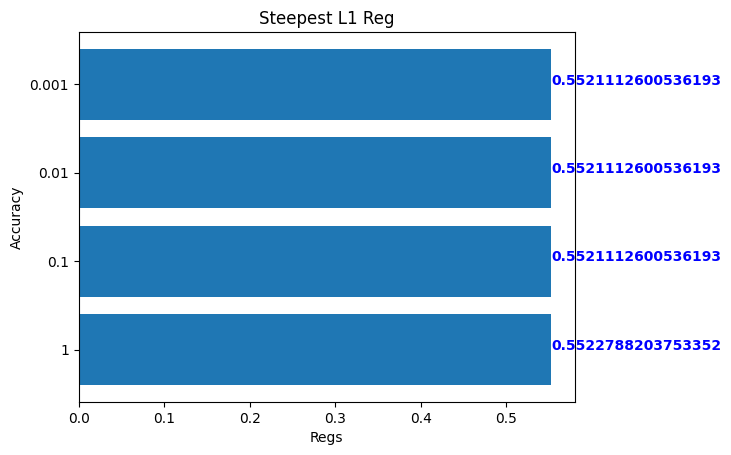

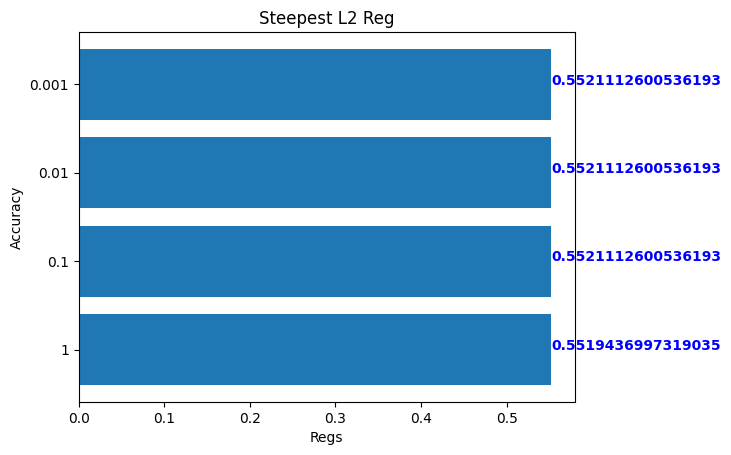

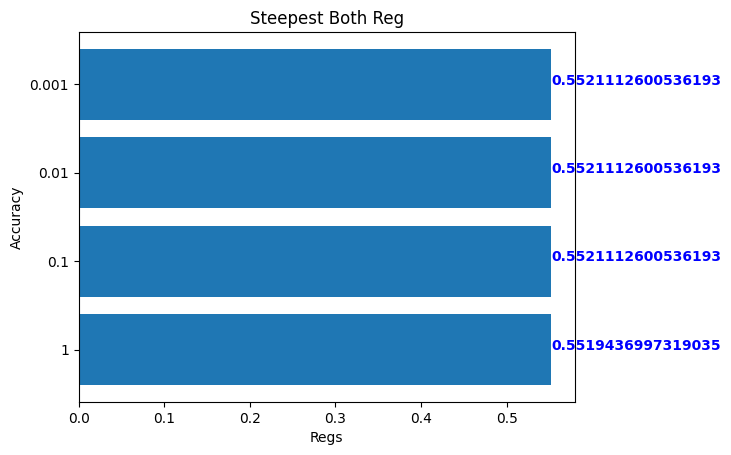

In [217]:
import matplotlib.pyplot as plt
#fig = plt.figure(figsize = (5, 8))

plt.barh(none_cs, none_accus)
plt.xlabel('Regs')
plt.ylabel('Accuracy')
plt.title('Steepest No Reg')

for index, value in enumerate(none_accus):
    plt.text(value, index,
             str(value), 
             color='blue',
             fontweight='bold')

plt.show()

plt.barh(l1_cs, l1_accus)
plt.xlabel('Regs')
plt.ylabel('Accuracy')
plt.title('Steepest L1 Reg')

for index, value in enumerate(l1_accus):
    plt.text(value, index,
             str(value), 
             color='blue',
             fontweight='bold')

plt.show()

plt.barh(l2_cs, l2_accus)
plt.xlabel('Regs')
plt.ylabel('Accuracy')
plt.title('Steepest L2 Reg')

for index, value in enumerate(l2_accus):
    plt.text(value, index,
             str(value), 
             color='blue',
             fontweight='bold')

plt.show()

plt.barh(both_cs, both_accus)
plt.xlabel('Regs')
plt.ylabel('Accuracy')
plt.title('Steepest Both Reg')

for index, value in enumerate(both_accus):
    plt.text(value, index,
             str(value), 
             color='blue',
             fontweight='bold')

plt.show()


In [218]:
stochastic = []
for i in range(len(methods)):
    if methods[i][0] == 'stochastic':
        temp = [methods[i][0], methods[i][1], methods[i][2], accuracies[i]]
        stochastic.append(temp)

stochastic_none = []
stochastic_l1 = []
stochastic_l2 = []
stochastic_both = []

none_regs = []
l1_regs = []
l2_regs = []
both_regs = []

none_accus = []
l1_accus = []
l2_accus = []
both_accus = []

none_cs = []
l1_cs = []
l2_cs = []
both_cs = []

regs = []
accus = []

for i in range(len(stochastic)):
    regs.append(stochastic[i][1])
    accus.append(stochastic[i][3])
    
    if stochastic[i][1] == 'none': 
        stochastic_none.append(stochastic[i])
        none_regs.append(stochastic[i][1])
        none_accus.append(stochastic[i][3])
        none_cs.append(stochastic[i][2])
        
    elif stochastic[i][1] == 'l1': 
        stochastic_l1.append(stochastic[i])
        l1_regs.append(stochastic[i][1])
        l1_accus.append(stochastic[i][3])
        l1_cs.append(stochastic[i][2])

    elif stochastic[i][1] == 'l2': 
        stochastic_l2.append(stochastic[i])
        l2_regs.append(stochastic[i][1])
        l2_accus.append(stochastic[i][3])
        l2_cs.append(stochastic[i][2])

    elif stochastic[i][1] == 'l1l2':
        stochastic_both.append(stochastic[i])
        both_regs.append(stochastic[i][1])
        both_accus.append(stochastic[i][3])
        both_cs.append(stochastic[i][2])

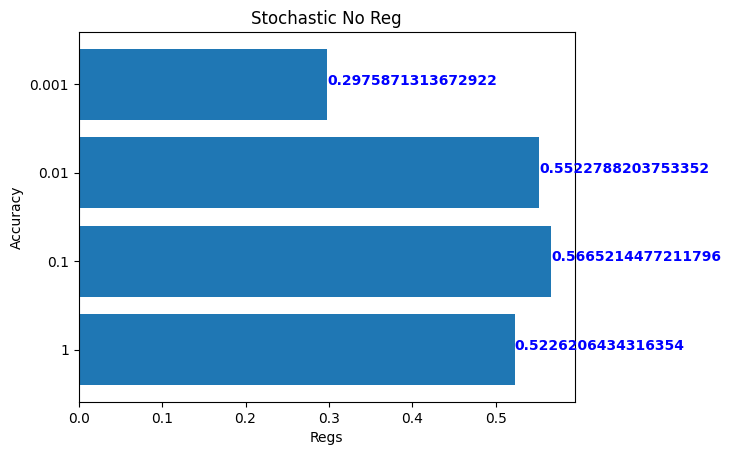

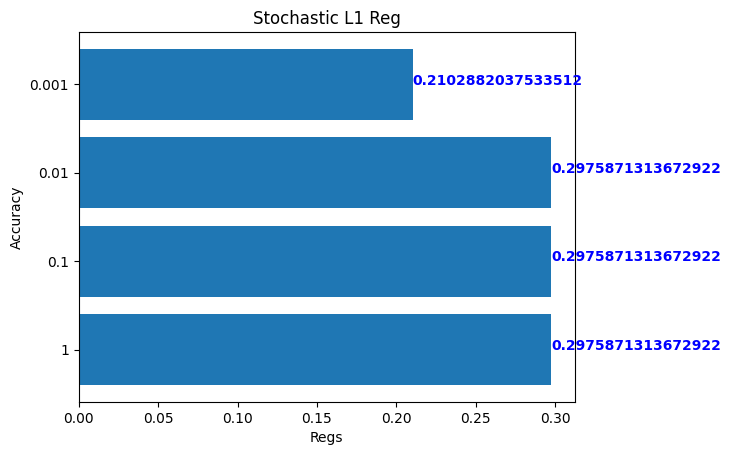

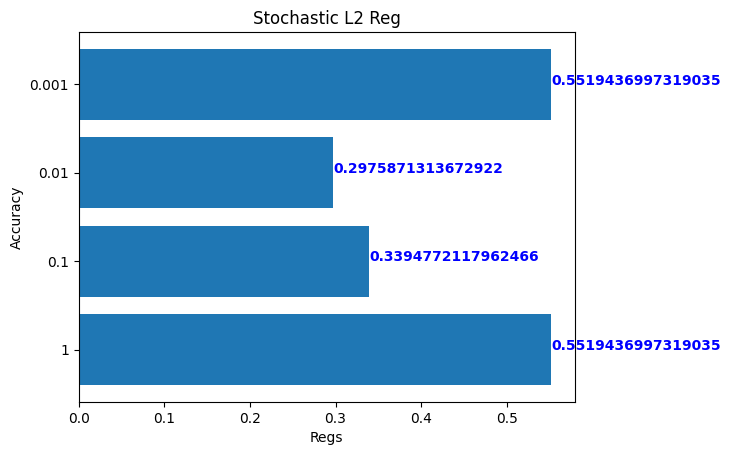

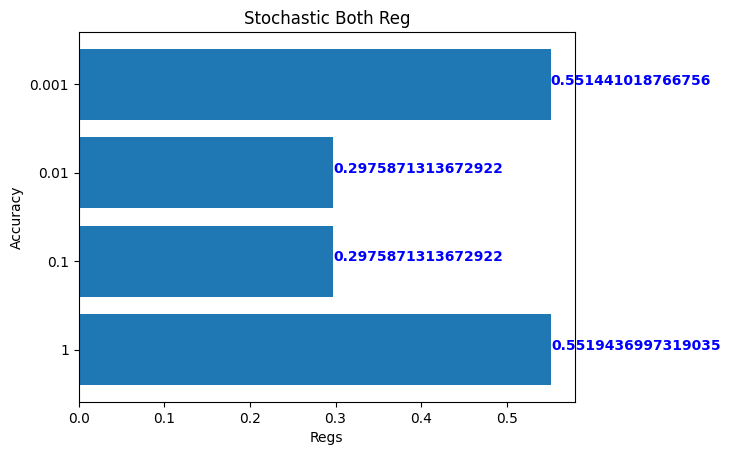

In [219]:
#fig = plt.figure(figsize = (5, 8))
ax = plt.subplots()

plt.barh(none_cs, none_accus)
plt.xlabel('Regs')
plt.ylabel('Accuracy')
plt.title('Stochastic No Reg')

for index, value in enumerate(none_accus):
    plt.text(value, index,
             str(value), 
             color='blue',
             fontweight='bold')


plt.show()

plt.barh(l1_cs, l1_accus)
plt.xlabel('Regs')
plt.ylabel('Accuracy')
plt.title('Stochastic L1 Reg')

for index, value in enumerate(l1_accus):
    plt.text(value, index,
             str(value), 
             color='blue',
             fontweight='bold')

plt.show()

plt.barh(l2_cs, l2_accus)
plt.xlabel('Regs')
plt.ylabel('Accuracy')
plt.title('Stochastic L2 Reg')

for index, value in enumerate(l2_accus):
    plt.text(value, index,
             str(value), 
             color='blue',
             fontweight='bold')

plt.show()

plt.barh(both_cs, both_accus)
plt.xlabel('Regs')
plt.ylabel('Accuracy')
plt.title('Stochastic Both Reg')

for index, value in enumerate(both_accus):
    plt.text(value, index,
             str(value), 
             color='blue',
             fontweight='bold')

plt.show()


In [220]:
newton = []
for i in range(len(methods)):
    if methods[i][0] == 'newton':
        temp = [methods[i][0], methods[i][1], methods[i][2], accuracies[i]]
        newton.append(temp)

newton_none = []
newton_l1 = []
newton_l2 = []
newton_both = []

none_regs = []
l1_regs = []
l2_regs = []
both_regs = []

none_accus = []
l1_accus = []
l2_accus = []
both_accus = []

none_cs = []
l1_cs = []
l2_cs = []
both_cs = []

regs = []
accus = []

for i in range(len(newton)):
    regs.append(newton[i][1])
    accus.append(newton[i][3])
    
    if newton[i][1] == 'none': 
        newton_none.append(newton[i])
        none_regs.append(newton[i][1])
        none_accus.append(newton[i][3])
        none_cs.append(newton[i][2])
        
    elif newton[i][1] == 'l1': 
        newton_l1.append(newton[i])
        l1_regs.append(newton[i][1])
        l1_accus.append(newton[i][3])
        l1_cs.append(newton[i][2])

    elif newton[i][1] == 'l2': 
        newton_l2.append(newton[i])
        l2_regs.append(newton[i][1])
        l2_accus.append(newton[i][3])
        l2_cs.append(newton[i][2])

    elif newton[i][1] == 'l1l2':
        newton_both.append(newton[i])
        both_regs.append(newton[i][1])
        both_accus.append(newton[i][3])
        both_cs.append(newton[i][2])

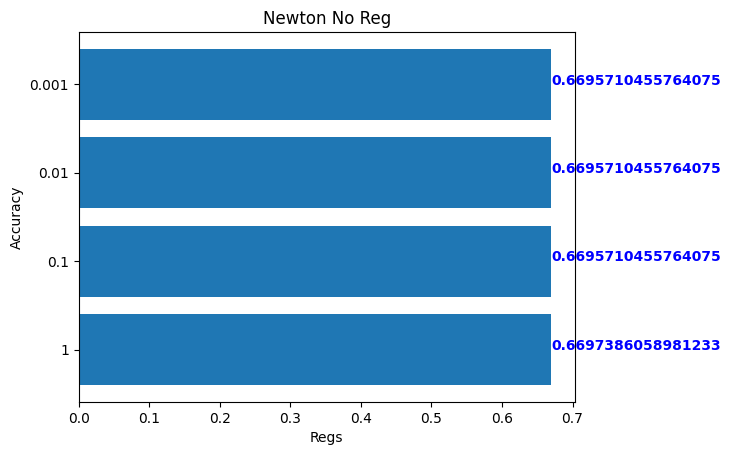

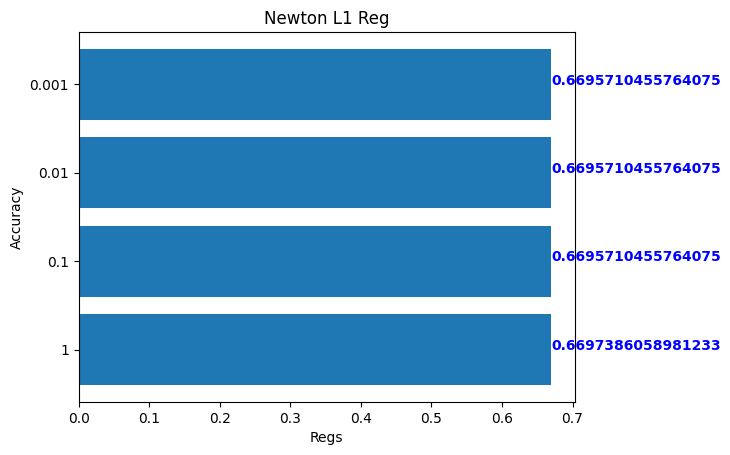

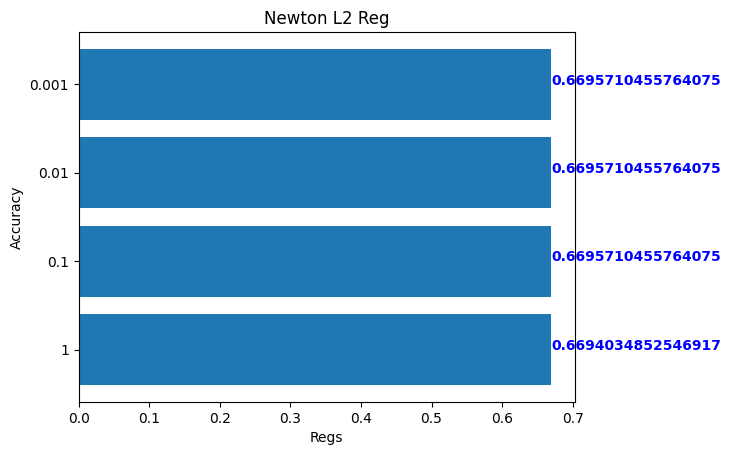

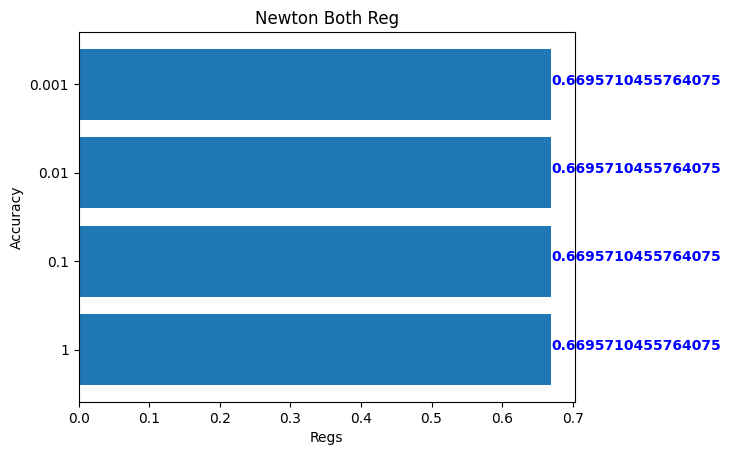

In [221]:
#fig = plt.figure(figsize = (5, 8))

plt.barh(none_cs, none_accus)
plt.xlabel('Regs')
plt.ylabel('Accuracy')
plt.title('Newton No Reg')

for index, value in enumerate(none_accus):
    plt.text(value, index,
             str(value), 
             color='blue',
             fontweight='bold')

plt.show()

plt.barh(l1_cs, l1_accus)
plt.xlabel('Regs')
plt.ylabel('Accuracy')
plt.title('Newton L1 Reg')

for index, value in enumerate(l1_accus):
    plt.text(value, index,
             str(value), 
             color='blue',
             fontweight='bold')

plt.show()

plt.barh(l2_cs, l2_accus)
plt.xlabel('Regs')
plt.ylabel('Accuracy')
plt.title('Newton L2 Reg')

for index, value in enumerate(l2_accus):
    plt.text(value, index,
             str(value), 
             color='blue',
             fontweight='bold')

plt.show()

plt.barh(both_cs, both_accus)
plt.xlabel('Regs')
plt.ylabel('Accuracy')
plt.title('Newton Both Reg')

for index, value in enumerate(both_accus):
    plt.text(value, index,
             str(value), 
             color='blue',
             fontweight='bold')

plt.show()



### Performance Comparison

In [222]:
print( methods[maxAccIndex][0], methods[maxAccIndex][1], methods[maxAccIndex][2])
print(accuracies[maxAccIndex])

newton none 1
0.6697386058981233


In [223]:
%%time
# time to compare best accuracy found from methods to scikit learn
lr = LogisticRegression(eta=0.1, iterations=100, optimization=methods[maxAccIndex][0], reg=methods[maxAccIndex][1], c=int(methods[maxAccIndex][2]) )
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

accuracy = accuracy_score(y_test, yhat)
print(accuracy)


0.6697386058981233
CPU times: total: 1h 33min 57s
Wall time: 8min 33s


In [224]:
%%time
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

lr_sk = LogisticRegression(solver='newton-cg',n_jobs=1,
                           multi_class='ovr', C = 1, 
                           penalty='l2',
                          max_iter=100) # all params default
# note that sklearn is optimized for using the liblinear library with logistic regression
# ...and its faster than our implementation here

lr_sk.fit(X_train, y_train) # no need to add bias term, sklearn does it internally!!
#print(lr_sk.coef_)
yhat = lr_sk.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

C:\Users\naimb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\naimb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\naimb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Accuracy of:  0.6506367292225201
CPU times: total: 406 ms
Wall time: 6.06 s


In order to compare the two Logistic Regression classes, we used the most accurate example training the custom Logistic Regression class. This would turn out to be the "newton" optimization method with no reg method and a c value of 1.

As can be seen after running the two Logistic Regression functions, the custom Logistic Regression class shows to be more accurate than the one provided by SciKit-Learn. Though by just a small amount, the SciKit-Learn implementation of the Logistic Regression class and much faster than the custom one. While one takes almost 6 minutes to run, the latter finishes performing Logistic Regression at just under 4 seconds. This makes the provided Logistic Regression class a much more reliable, based on its speed and similar accuracy.

## Deployment (Naim Part)

Which implementation of logistic regression would you advise be used in a deployed machine learning model, your implementation or scikit-learn (or other third party)? Why?

## Exceptional Work (Naim Part)

You have free rein to provide additional analyses (5000 level students)

One idea: Update the code to use either "one-versus-all" or "one-versus-one" extensions of binary to multi-class classification. 

Another idea: Create a table comparing run times and accuracy for various techniques. 

Required for 7000 level students: Choose ONE of the following:

Option One: Implement an optimization technique for logistic regression using mean square error as your objective function (instead of maximum likelihood). Derive the gradient updates for the Hessian and use Newton's method to update the values of "w". Then answer, which process do you prefer: maximum likelihood OR minimum mean-squared error? 

Option Two: Implement the BFGS algorithm from scratch to optimize logistic regression. That is, use BFGS without the use of an external package (for example, do not use SciPy). Compare your performance accuracy and runtime to the BFGS implementation in SciPy (that we used in lecture). 
